    Exercise Week 2

In [1]:
from IPython import display
import pandas as pd
import regex as re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Task 1

In [2]:
#read data
data = pd.read_csv('points.txt', names = ['X', 'y'], delimiter = '\s+')

In [3]:
#split into test and train set
train = data.sample(frac = 0.5, random_state= 42)
test = data.drop(train.index)

In [4]:
#define X and y for each set
X_train = train['X']
y_train = train['y']

X_test = test['X']
y_test = test['y']

## 1.a

In [5]:
#defining parameters & matrices
alpha = 2
beta = 25

design_matrix = np.c_[np.ones_like(X_train), X_train]
id_matrix = np.identity(2)

In [6]:
#calculate covariance matrix sigma and mean 
sigma = np.linalg.inv(alpha * id_matrix + beta * design_matrix.T @ design_matrix)
mu = beta * sigma @ design_matrix.T @ y_train

#sample w0 and w1
w = np.random.multivariate_normal(mu.ravel(), sigma,1).T
print(f'w = {w}')

w = [[0.04384182]
 [0.83542571]]


## 1.b

In [7]:
#getting 10 different samples of w, predicting y and saving ys in list
i = 0
y_list = []

while i < 10:
    w = np.random.multivariate_normal(mu.ravel(), sigma,1).T
    y = design_matrix @ w
    y_list.append(y)
    i+=1

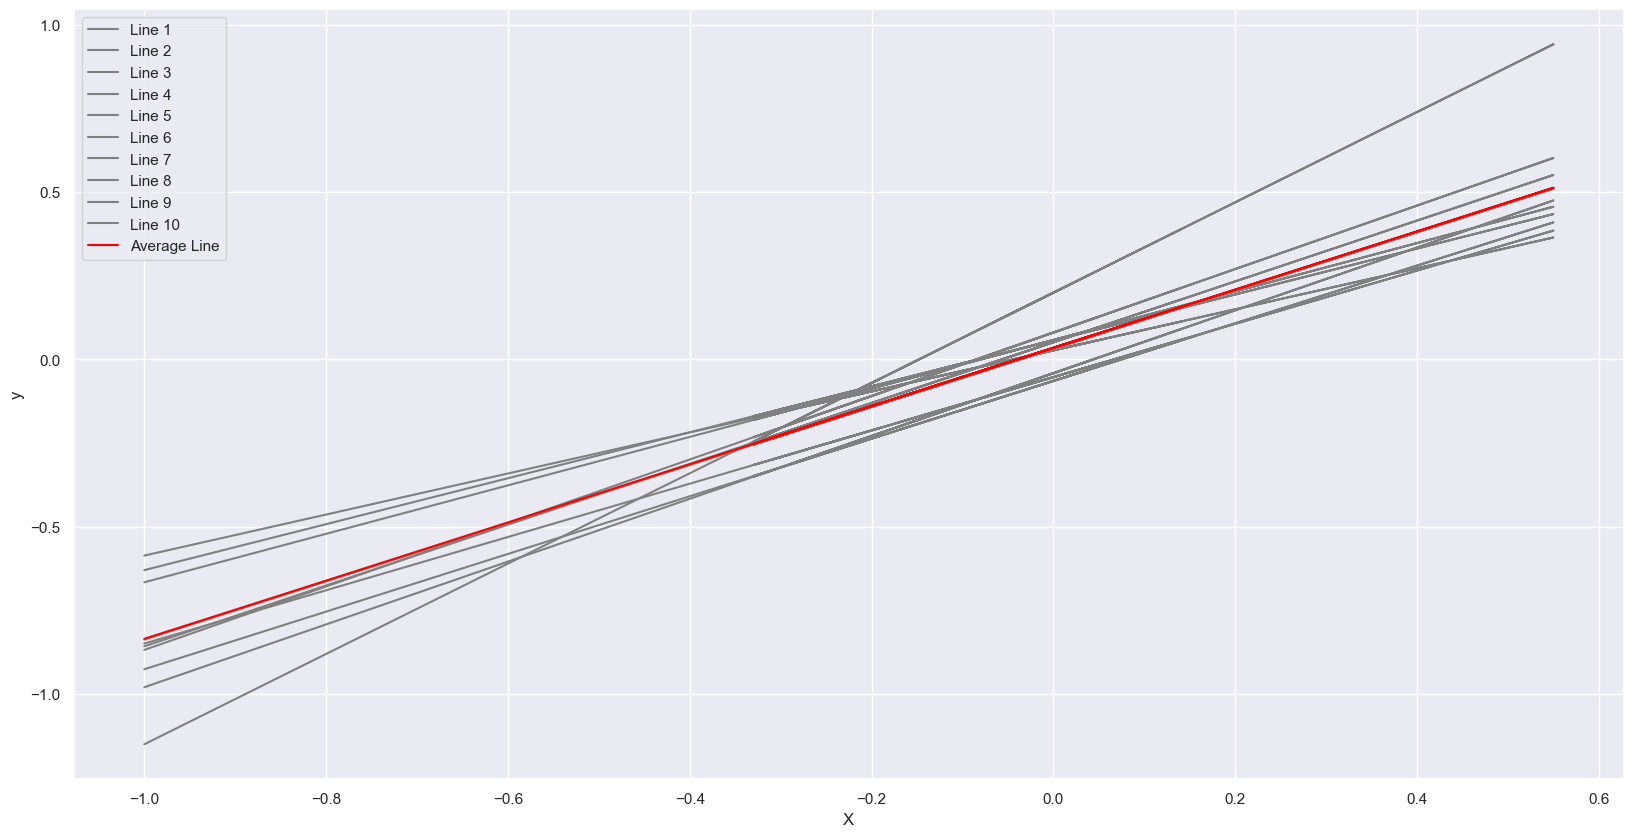

In [8]:
# Create a figure and axis
sns.set(rc={"figure.figsize":(20, 10)}) 
fig, ax = plt.subplots()

for i, values in enumerate(y_list):
    ax.plot(X_train, values, color='grey', label=f'Line {i+1}')

# Calculate mean y for average line
y_matrix = np.hstack(y_list)
y_means = np.mean(y_matrix, axis=1)

#plot average line
ax.plot(X_train, y_means, color='red', label='Average Line')

# Customize the plot
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)

## 1.c & 1.d

In [9]:
# Function to score RMSE
def rmse(y_actual, y_predicted):
    mse = np.mean((y_actual - y_predicted) ** 2)
    rmse = np.sqrt(mse).round(3)
    return rmse

In [10]:
#predict y
y_test_pred = w[0] + w[1] * X_test
y_train_pred = w[0] + w[1] * X_train

#calculate RMSE
rmse_test = rmse(y_test, y_test_pred)
rmse_train = rmse(y_train, y_train_pred)
print(f'Train Set RMSE: {rmse_train}\nTest Set RMSE: {rmse_test}')

Train Set RMSE: 0.161
Test Set RMSE: 0.23


# Task 2

## 2.a

In [11]:
#computing X and y
X = np.random.uniform(0,1,250).reshape(-1,1) #uniform distribution between 0 and 1
y = np.sin(2* np.pi * X) + np.random.normal(0, 0.3**2)

## 2.b

In [12]:
#define mu and s
mu_list = [0.001, 0.1, 0.125, 0.4, 0.6, 0.75, 0.8, 0.95, 0.99 ]
s = 0.02

#compute vectors for each mu
vec_list = []
for mu in mu_list:
    vec = np.exp(- (X-mu)**2 / 2*s**2)
    vec_list.append(vec)

#combine X and vecs in design matrix
matrix = np.hstack(vec_list)

In [13]:
matrix.shape

(250, 9)

In [14]:
matrix_T = matrix.T

## 2.c

## 2.d

# Task 3

## 3.a

In [15]:
iris = pd.read_csv('iris.csv', names = ['x1', 'x2', 'x3', 'x4', 'label'])
iris.head()

,x1,x2,x3,x4,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


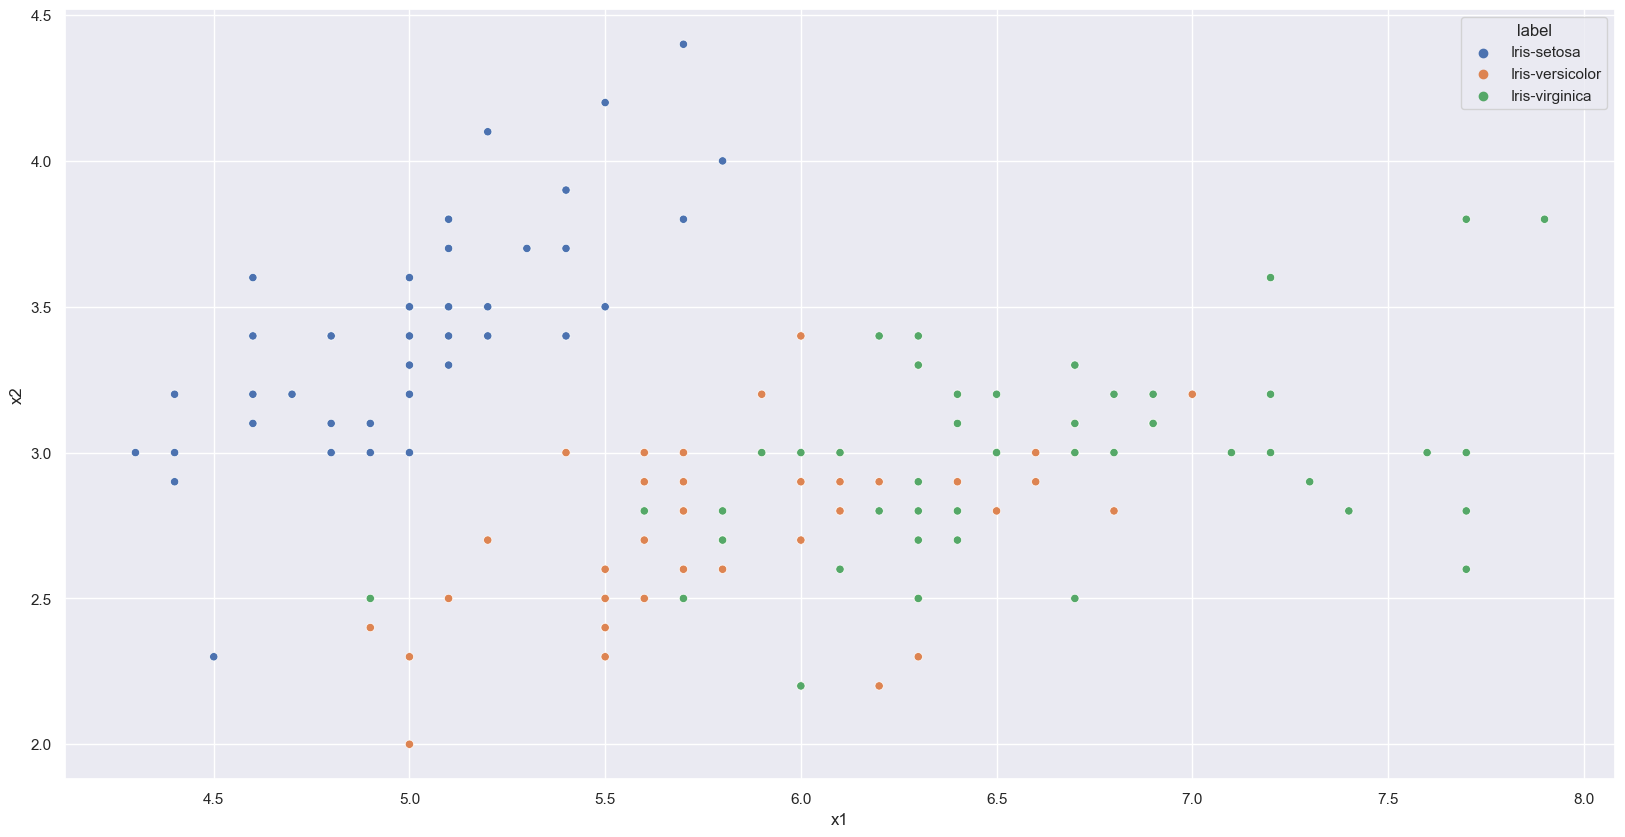

In [16]:
sns.set(rc={"figure.figsize":(20, 10)}) 
sns.scatterplot( x= 'x1', y = 'x2', hue = 'label', data = iris);

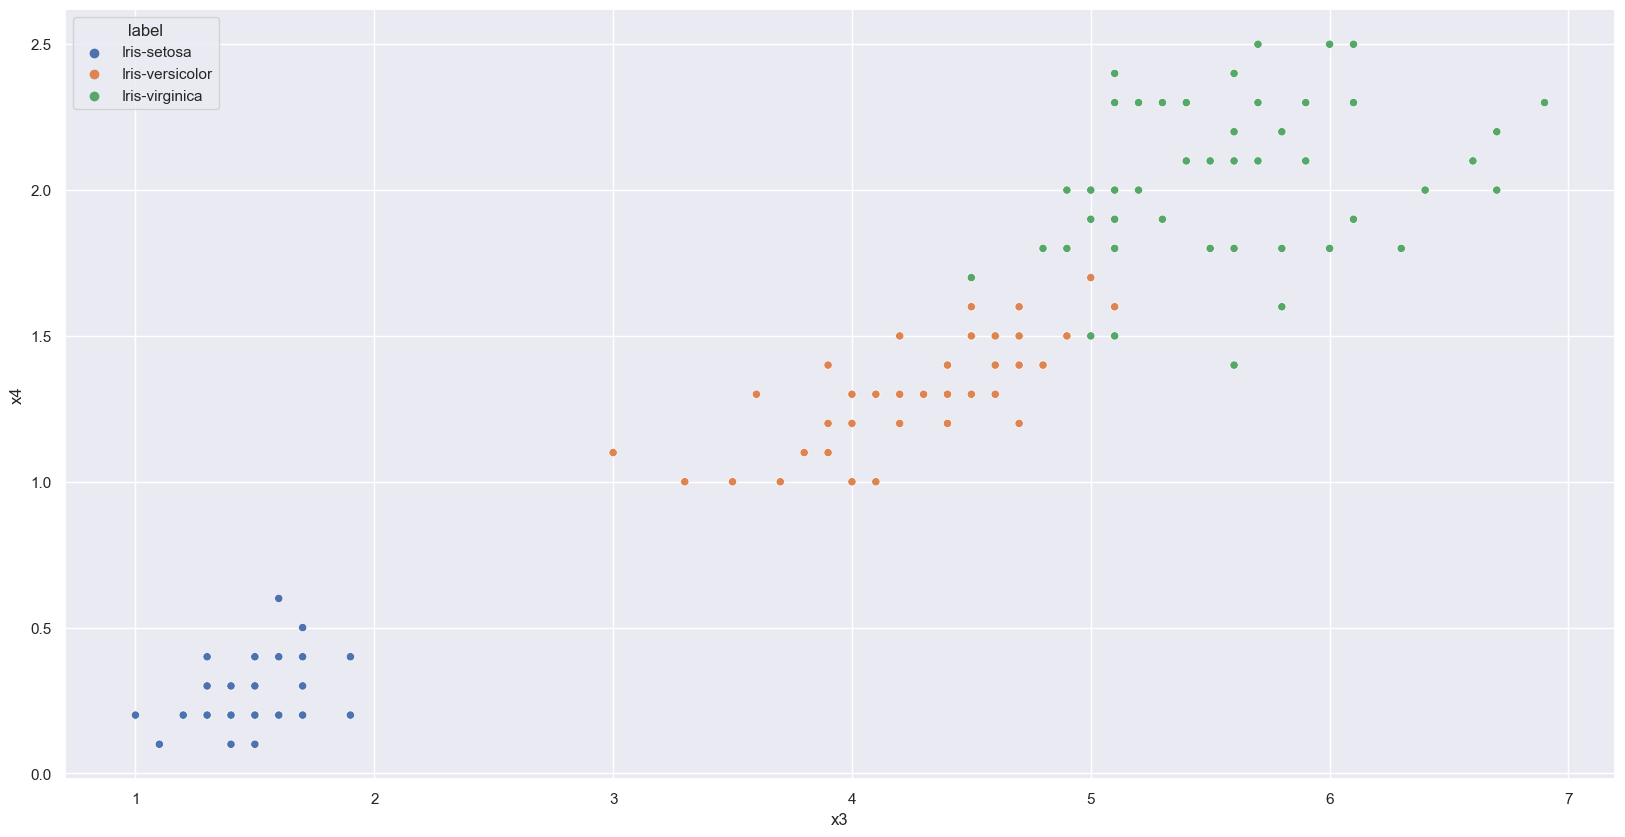

In [17]:
sns.scatterplot( x= 'x3', y = 'x4', hue = 'label', data = iris);

## 3.b

In [18]:
#get list of labels
labels = iris['label'].unique()
means = []

#for each label calculate mean for each column
for label in labels:
    #filter df down for each class and drop label column
    class_data = iris[iris['label'] == label].drop('label', axis = 1)
    #calculate mean colum-wise
    mean = np.mean(class_data, axis=0) 
    means.append(mean)
    
mean_k1 = means[0]
mean_k2 = means[1]
mean_k3 = means[2]

## 3.c

In [19]:
#class 1

#filter down df for class 1
class_df = iris[iris['label'] == labels[0]]

#center all x vars
x1_center = class_df['x1'] - mean_k1
x2_center = class_df['x2'] - mean_k1
x3_center = class_df['x3'] - mean_k1
x4_center = class_df['x4'] - mean_k1

#calculate matrix
cov_matrix_k1 = 1/50 * ((x1_center @ x1_center.T) + (x2_center @ x2_center.T) + (x3_center @ x3_center.T) + (x4_center @ x4_center.T))

In [20]:
#empty list to store matrices
matrices = []

for label in labels:
    #filter df for each class and drop label column
    class_data = iris[iris['label'] == label].drop('label', axis = 1)
    #calculate mean
    class_sample_mean = np.mean(class_data, axis=0)  
    #center by subtracting mean
    centered_data = class_data - class_sample_mean
    cov_matrix = np.dot(centered_data.T, centered_data) / 50
    matrices.append(cov_matrix)

#convert to np array
matrices = np.array(matrices)

In [21]:
#save cov matrix for each of the classes
cov_k1 = matrices[0]
cov_k2 = matrices[1]
cov_k3 = matrices[2]

In [22]:
#check shape
cov_k1.shape

(4, 4)

## 3.d

In [23]:
#compute joint matrix
joint_matrix = 1/3 * (cov_k1 + cov_k2 + cov_k3)
#check shape
joint_matrix.shape

(4, 4)

## 3.e

In [24]:
#define function to compute w_k0
def comp_w0(sample_mean):
    return 0.5 * sample_mean.T @ np.linalg.inv(joint_matrix) @ sample_mean + np.log(1/3)

In [25]:
#define function to compute w_k0
def comp_wk(sample_mean):
    return(np.linalg.inv(joint_matrix) @ sample_mean)

In [26]:
#calculate w_0k for each class
w0_1 = comp_w0(mean_k1)
w0_2 = comp_w0(mean_k2)
w0_3 = comp_w0(mean_k3)

#calculate w_k for each class
w_1 = comp_wk(mean_k1)
w_2 = comp_wk(mean_k2)
w_3 = comp_wk(mean_k3)

## 3.f

In [27]:
#class 1
samp_1_k1 = np.random.multivariate_normal(mean_k1, joint_matrix, size = 4)
samp_2_k1 = np.random.multivariate_normal(mean_k1, joint_matrix, size = 4)

In [28]:
#class 2
samp_1_k2 = np.random.multivariate_normal(mean_k2, joint_matrix, size = 4)
samp_2_k2 = np.random.multivariate_normal(mean_k2, joint_matrix, size = 4)

In [29]:
#class 3
samp_1_k3 = np.random.multivariate_normal(mean_k3, joint_matrix, size = 4)
samp_2_k3 = np.random.multivariate_normal(mean_k3, joint_matrix, size = 4)

## 3.g

In [30]:
#samples from class 1
a1_1 = (w_1.T @ samp_1_k1) + w0_1
a1_2 = w_1.T @ samp_2_k1 + w0_1

#samples from class 2
a2_1 = w_2.T @ samp_1_k2 + w0_2
a2_2 = w_2.T @ samp_2_k2 + w0_2

#samples from class 3
a3_1 = w_3.T @ samp_1_k3 + w0_3
a3_2 = w_3.T @ samp_2_k3 + w0_3

In [38]:
print(np.argmax(a1_1, axis = 0), np.argmax(a1_2))

0 0


In [33]:
print(np.argmax(a2_1), np.argmax(a2_2))

0 0


In [34]:
print(np.argmax(a3_1), np.argmax(a3_2))

0 0


# Task 4

The underlying dataset seems to be very unbalanced. More specifically, 95% of datapoint are labelled as "healthy", and only 5% as ill. In cases of datasets that are this heavily unbalanced, models oven achieve the best accuracy if they simply label all the data with one label - as is the case in the example.

Better measure would be Precision or Recall. In the given example, we probably mind it less if healthy people are labelled ill, but want to make sure, that we definitely catch all ill people, so recall would be a good measure.

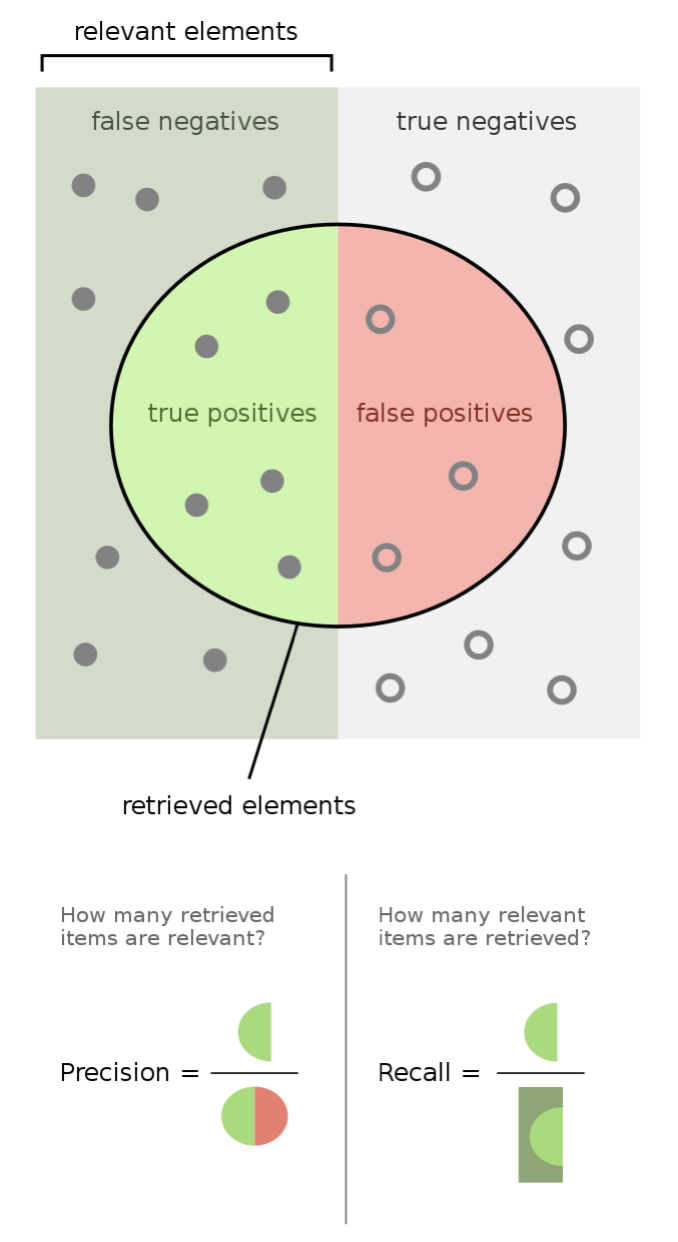

In [40]:
display.Image('/Users/emilykruger/Library/CloudStorage/OneDrive-Personal/Dokumente/Master/05_AdvancedMachineLearning/w2_regression_/Screenshot 2023-09-11 at 10.06.38.png')